In [ ]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=3ee63402ab90ba370f327b717725cc13f1cc3222bd237478c7fcde081a3547e7
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Reshape, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pretty_midi
from sklearn.model_selection import train_test_split

In [ ]:
# Define the generator with additional parameters for tempo, chord progression, and instrument
def build_generator(latent_dim, num_notes, num_instruments):
    # Input layers for noise, tempo, chord progression, and instrument
    noise = Input(shape=(latent_dim,))
    tempo = Input(shape=(1,))
    chord_progression = Input(shape=(num_chords,))
    instrument = Input(shape=(num_instruments,))

    # Concatenate the inputs
    x = concatenate([noise, tempo, chord_progression, instrument])

    # Generator network architecture
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    output_notes = Dense(num_notes, activation='sigmoid')(x)
    return Model([noise, tempo, chord_progression, instrument], output_notes)

# Define the discriminator (unchanged)
def build_discriminator(num_notes):
    music = Input(shape=(num_notes,))
    x = Reshape((num_notes, 1))(music)
    validity = Dense(1, activation='sigmoid')(x)
    return Model(music, validity)

In [ ]:
# Define the dimensions and parameters
latent_dim = 100
num_notes = 128  # Number of notes in a music piece
num_chords = 4   # Number of chords in the chord progression
num_instruments = 128  # Total number of instruments (adjust as needed)
epochs = 500      # Reduced number of epochs
batch_size = 32   # Reduced batch size for faster training # NOTE (Actually, you would increase it for faster training)

In [ ]:
def parser(self, folderName):





        for file in glob.glob(f"{folderName}/*.mid"):
            midi = converter.parse(file)
            print("Parsing %s" % file)

            notes = []
            for element in midi.flat.elements:
                if isinstance(element, note.Rest) and element.offset != 0:
                    notes.append('R')
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                if isinstance(element, chord.Chord):
                    notes.append('.'.join(str(pitch) for pitch in element.pitches))

            self.file_notes.append(notes)
        note_set = sorted(set(note for notes in self.file_notes for note in notes))
        self.dic_n = len(note_set)
        # A dictionary to map notes, chords and rest to integers
        self.transfer_dic = dict((note, number) for number, note in enumerate(note_set))


In [ ]:
X = parser(__init__(self), '/kaggle/input/lakh-midi-clean')
X_train, X_test_validate = train_test_split(X, test_size=0.2, random_state=42)
X_test, X_validate = train_test_split(X_test_validate, test_size=0.5, random_state=42)

In [ ]:
# Build the generator and discriminator
generator = build_generator(latent_dim, num_notes, num_instruments)
discriminator = build_discriminator(num_notes)  # NOTE: Is output_notes the same value as num_notes?

In [ ]:
# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# The generator takes noise, tempo, chord progression, and instrument as input and generates music
noise = Input(shape=(latent_dim,))
tempo = Input(shape=(1,))
chord_progression = Input(shape=(num_chords,))
instrument = Input(shape=(num_instruments,))
generated_music = generator([noise, tempo, chord_progression, instrument])

In [ ]:
# The discriminator takes generated music as input and determines validity
validity = discriminator(generated_music)

# The combined model (stacked generator and discriminator)
combined = Model([noise, tempo, chord_progression, instrument], validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

vanilla gans for piano
train test vali included

1/1 [==============================] - 0s 465ms/step
0 [D loss: 0.708518, acc.: 12.50%] [G loss: 0.678898]
1/1 [==============================] - 0s 17ms/step
1 [D loss: 0.701246, acc.: 50.00%] [G loss: 0.684939]
1/1 [==============================] - 0s 17ms/step
2 [D loss: 0.696294, acc.: 50.00%] [G loss: 0.701261]
1/1 [==============================] - 0s 17ms/step
3 [D loss: 0.692205, acc.: 64.06%] [G loss: 0.720009]
1/1 [==============================] - 0s 20ms/step
4 [D loss: 0.690955, acc.: 50.00%] [G loss: 0.728423]
1/1 [==============================] - 0s 19ms/step
5 [D loss: 0.695087, acc.: 50.00%] [G loss: 0.727566]
1/1 [==============================] - 0s 19ms/step
6 [D loss: 0.694086, acc.: 50.00%] [G loss: 0.736004]
1/1 [==============================] - 0s 17ms/step
7 [D loss: 0.693235, acc.: 50.00%] [G loss: 0.744284]
1/1 [==============================] - 0s 17ms/step
8 [D loss: 0.691204, acc.: 50.00%] [G loss: 0.752716]
1/1 [==============================] - 0s 18m

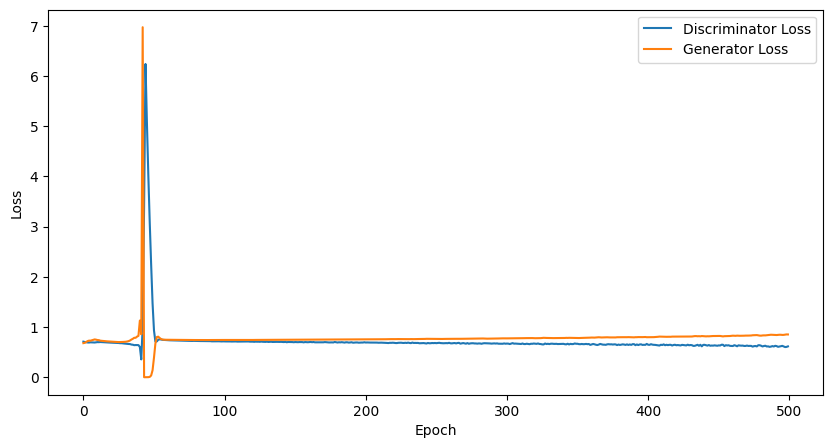

In [ ]:
# Training loop
for epoch in range(epochs):
    # Select a random batch of music
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_music = X_train[idx]

    # Generate a batch of new music
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Adjust the instrument to violin (1 is the program number for Violin)
    instrument_data = np.ones((batch_size, num_notes)) * 1

    # Adjust the chord progression to CFCG
    chord_progression_data = np.array([[0, 5, 7, 10]] * batch_size)

    # Adjust the tempo to 120 BPM
    tempo_data = np.ones((batch_size, 1)) * 120

    generated_music = generator.predict([noise, tempo_data, chord_progression_data, instrument_data])

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_music, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(generated_music, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # NOTE: Put this value in an array.

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = combined.train_on_batch([noise, tempo_data, chord_progression_data, instrument_data], np.ones((batch_size, 1)))  # NOTE: put this value in a different array

    # Print progress
    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

In [ ]:
# Generate some music samples (adjust num_samples as needed)
num_samples = 5
generated_samples = generator.predict([np.random.normal(0, 1, (num_samples, latent_dim)), y_test[:num_samples]])

# Save the generated samples as MIDI files
for i, sample in enumerate(generated_samples):
    midi_data = pretty_midi.PrettyMIDI()
    instrument_program = pretty_midi.instrument_name_to_program('Violin')
    instrument_track = pretty_midi.Instrument(program=instrument_program)
    for time, note_prob in enumerate(sample):
        if note_prob > 0.3:  # Play the note if the probability is above a threshold
            pitch = np.random.randint(0, 128)  # Random pitch between 0 and 127
            velocity = np.random.randint(0, 128)  # Random velocity between 0 and 127
            note_start = time * (60 / 120)  # Each time step is 60 / tempo seconds
            note_end = note_start + (60 / 120)  # Length of each note
            midi_note = pretty_midi.Note(
                velocity=velocity, pitch=pitch, start=note_start, end=note_end)
            instrument_track.notes.append(midi_note)
    # Add C major chord progression
    for j, chord_note in enumerate([60, 64, 67]):  # C, E, G
        chord_start = j * (60 / 120)  # Each chord lasts for 1 beat
        chord_end = chord_start + (60 / 120)  # Length of each chord
        midi_note = pretty_midi.Note(
            velocity=0, pitch=chord_note, start=chord_start, end=chord_end)
        instrument_track.notes.append(midi_note)
    midi_data.instruments.append(instrument_track)
    midi_data.write(f'generated_music_{i}.mid')

In [ ]:
# Save the generated samples as MIDI files
for i, sample in enumerate(generated_samples):
    midi_data = pretty_midi.PrettyMIDI()
    instrument_program = pretty_midi.instrument_name_to_program('Piano')
    instrument_track = pretty_midi.Instrument(program=instrument_program)
    for time, note_prob in enumerate(sample):
        if note_prob > 0.3:  # Play the note if the probability is above a threshold
            pitch = np.random.randint(0, 128)  # Random pitch between 0 and 127
            velocity = np.random.randint(0, 128)  # Random velocity between 0 and 127
            note_start = time * (60 / 120)  # Each time step is 60 / tempo seconds
            note_end = note_start + (60 / 120)  # Length of each note
            midi_note = pretty_midi.Note(
                velocity=velocity, pitch=pitch, start=note_start, end=note_end)
            instrument_track.notes.append(midi_note)
    # Add C major chord progression
    for j, chord_note in enumerate([60, 64, 67]):  # C, E, G
        chord_start = j * (60 / 120)  # Each chord lasts for 1 beat
        chord_end = chord_start + (60 / 120)  # Length of each chord
        midi_note = pretty_midi.Note(
            velocity=0, pitch=chord_note, start=chord_start, end=chord_end)
        instrument_track.notes.append(midi_note)
    midi_data.instruments.append(instrument_track)
    midi_data.write(f'generated_music_{i}.mid')

In [ ]:
# Save the generated samples as MIDI files
for i, sample in enumerate(generated_samples):
    midi_data = pretty_midi.PrettyMIDI()
    instrument_program = pretty_midi.instrument_name_to_program('Trumpet')
    instrument_track = pretty_midi.Instrument(program=instrument_program)
    for time, note_prob in enumerate(sample):
        if note_prob > 0.3:  # Play the note if the probability is above a threshold
            pitch = np.random.randint(0, 128)  # Random pitch between 0 and 127
            velocity = np.random.randint(0, 128)  # Random velocity between 0 and 127
            note_start = time * (60 / 120)  # Each time step is 60 / tempo seconds
            note_end = note_start + (60 / 120)  # Length of each note
            midi_note = pretty_midi.Note(
                velocity=velocity, pitch=pitch, start=note_start, end=note_end)
            instrument_track.notes.append(midi_note)
    # Add C major chord progression
    for j, chord_note in enumerate([60, 64, 67]):  # C, E, G
        chord_start = j * (60 / 120)  # Each chord lasts for 1 beat
        chord_end = chord_start + (60 / 120)  # Length of each chord
        midi_note = pretty_midi.Note(
            velocity=0, pitch=chord_note, start=chord_start, end=chord_end)
        instrument_track.notes.append(midi_note)
    midi_data.instruments.append(instrument_track)
    midi_data.write(f'generated_music_{i}.mid')

In [ ]:
# Save the generated samples as MIDI files
for i, sample in enumerate(generated_samples):
    midi_data = pretty_midi.PrettyMIDI()
    instrument_program = pretty_midi.instrument_name_to_program('Xylophone')
    instrument_track = pretty_midi.Instrument(program=instrument_program)
    for time, note_prob in enumerate(sample):
        if note_prob > 0.3:  # Play the note if the probability is above a threshold
            pitch = np.random.randint(0, 128)  # Random pitch between 0 and 127
            velocity = np.random.randint(0, 128)  # Random velocity between 0 and 127
            note_start = time * (60 / 120)  # Each time step is 60 / tempo seconds
            note_end = note_start + (60 / 120)  # Length of each note
            midi_note = pretty_midi.Note(
                velocity=velocity, pitch=pitch, start=note_start, end=note_end)
            instrument_track.notes.append(midi_note)
    # Add C major chord progression
    for j, chord_note in enumerate([60, 64, 67]):  # C, E, G
        chord_start = j * (60 / 120)  # Each chord lasts for 1 beat
        chord_end = chord_start + (60 / 120)  # Length of each chord
        midi_note = pretty_midi.Note(
            velocity=0, pitch=chord_note, start=chord_start, end=chord_end)
        instrument_track.notes.append(midi_note)
    midi_data.instruments.append(instrument_track)
    midi_data.write(f'generated_music_{i}.mid')